In [1]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

data = pd.read_csv("perf.csv")
data['delta_secs'] = data['delta_t'] / 1_000_000
data.head()

,gen,delta_t,alive,delta_secs
0,0,503351,6849447,0.503351
1,1,404063,6348477,0.404063
2,2,386855,6272407,0.386855
3,3,381746,5973159,0.381746
4,4,363449,5806511,0.363449


<Axes: title={'center': 'alive cells per generation'}, xlabel='gen', ylabel='# alive cells'>

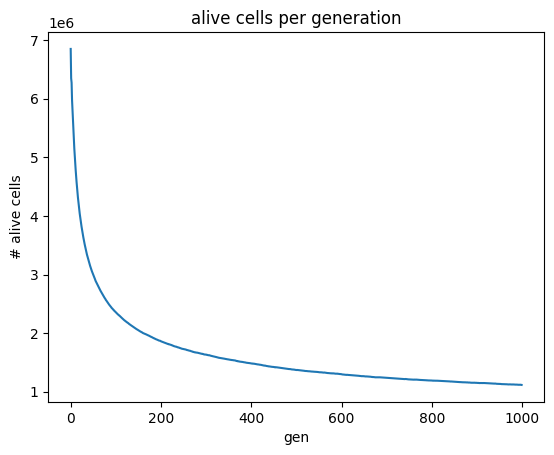

In [3]:
data["alive"].plot(title="alive cells per generation", xlabel="gen", ylabel="# alive cells")

<Axes: title={'center': 'time per generation'}, xlabel='gen', ylabel='time (s)'>

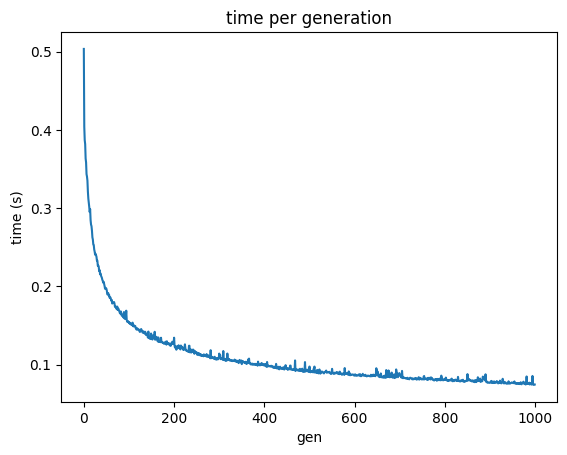

In [4]:
data['delta_secs'].plot(title="time per generation", xlabel="gen", ylabel="time (s)")

<Axes: title={'center': 'time vs alive cells'}, xlabel='# alive', ylabel='time (s)'>

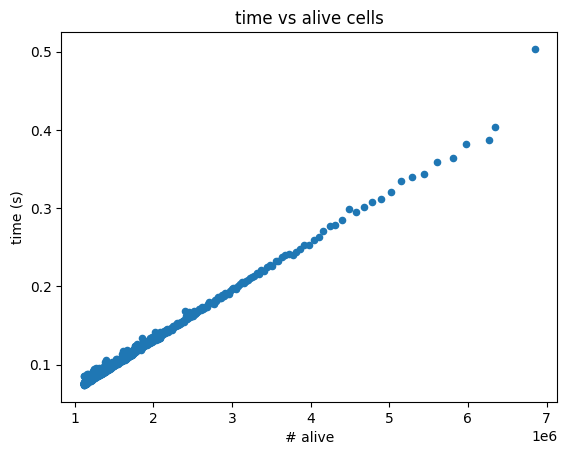

In [5]:
data.plot.scatter(x='alive', y='delta_secs', title="time vs alive cells", xlabel="# alive", ylabel="time (s)")

<Axes: title={'center': 'gen/s per generation'}, xlabel='gen', ylabel='gen/s'>

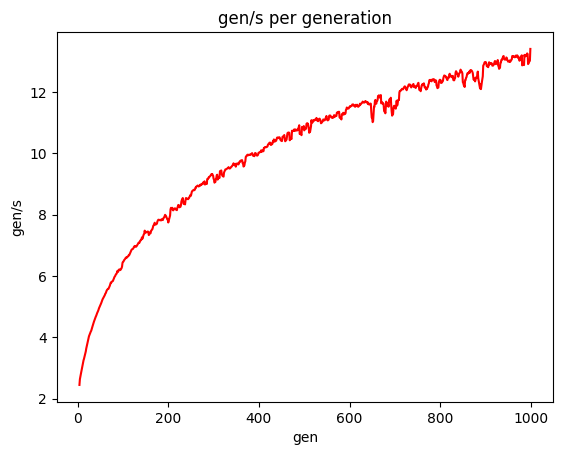

In [6]:
# rolling average to smooth graph
gens_per_sec = 1.0 / data['delta_secs'].rolling(window=5).mean()
gens_per_sec.plot(title="gen/s per generation", xlabel="gen", ylabel="gen/s", color="r")